In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [504]:
df_main = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_main.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [505]:
df_main.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [506]:
df_main.shape

(5000, 14)

In [507]:
df_main.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

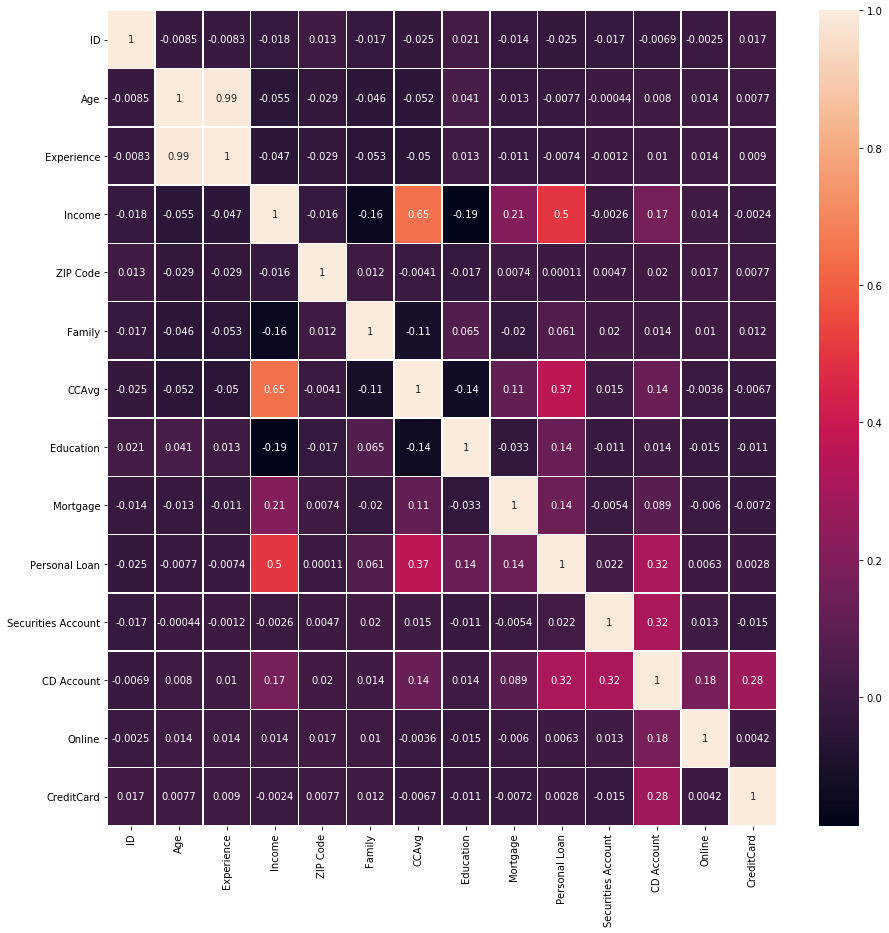

In [508]:
df_corr = df_main.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr,annot = True,fmt = '0.2g',linewidths=0.5,ax=ax)
plt.show()

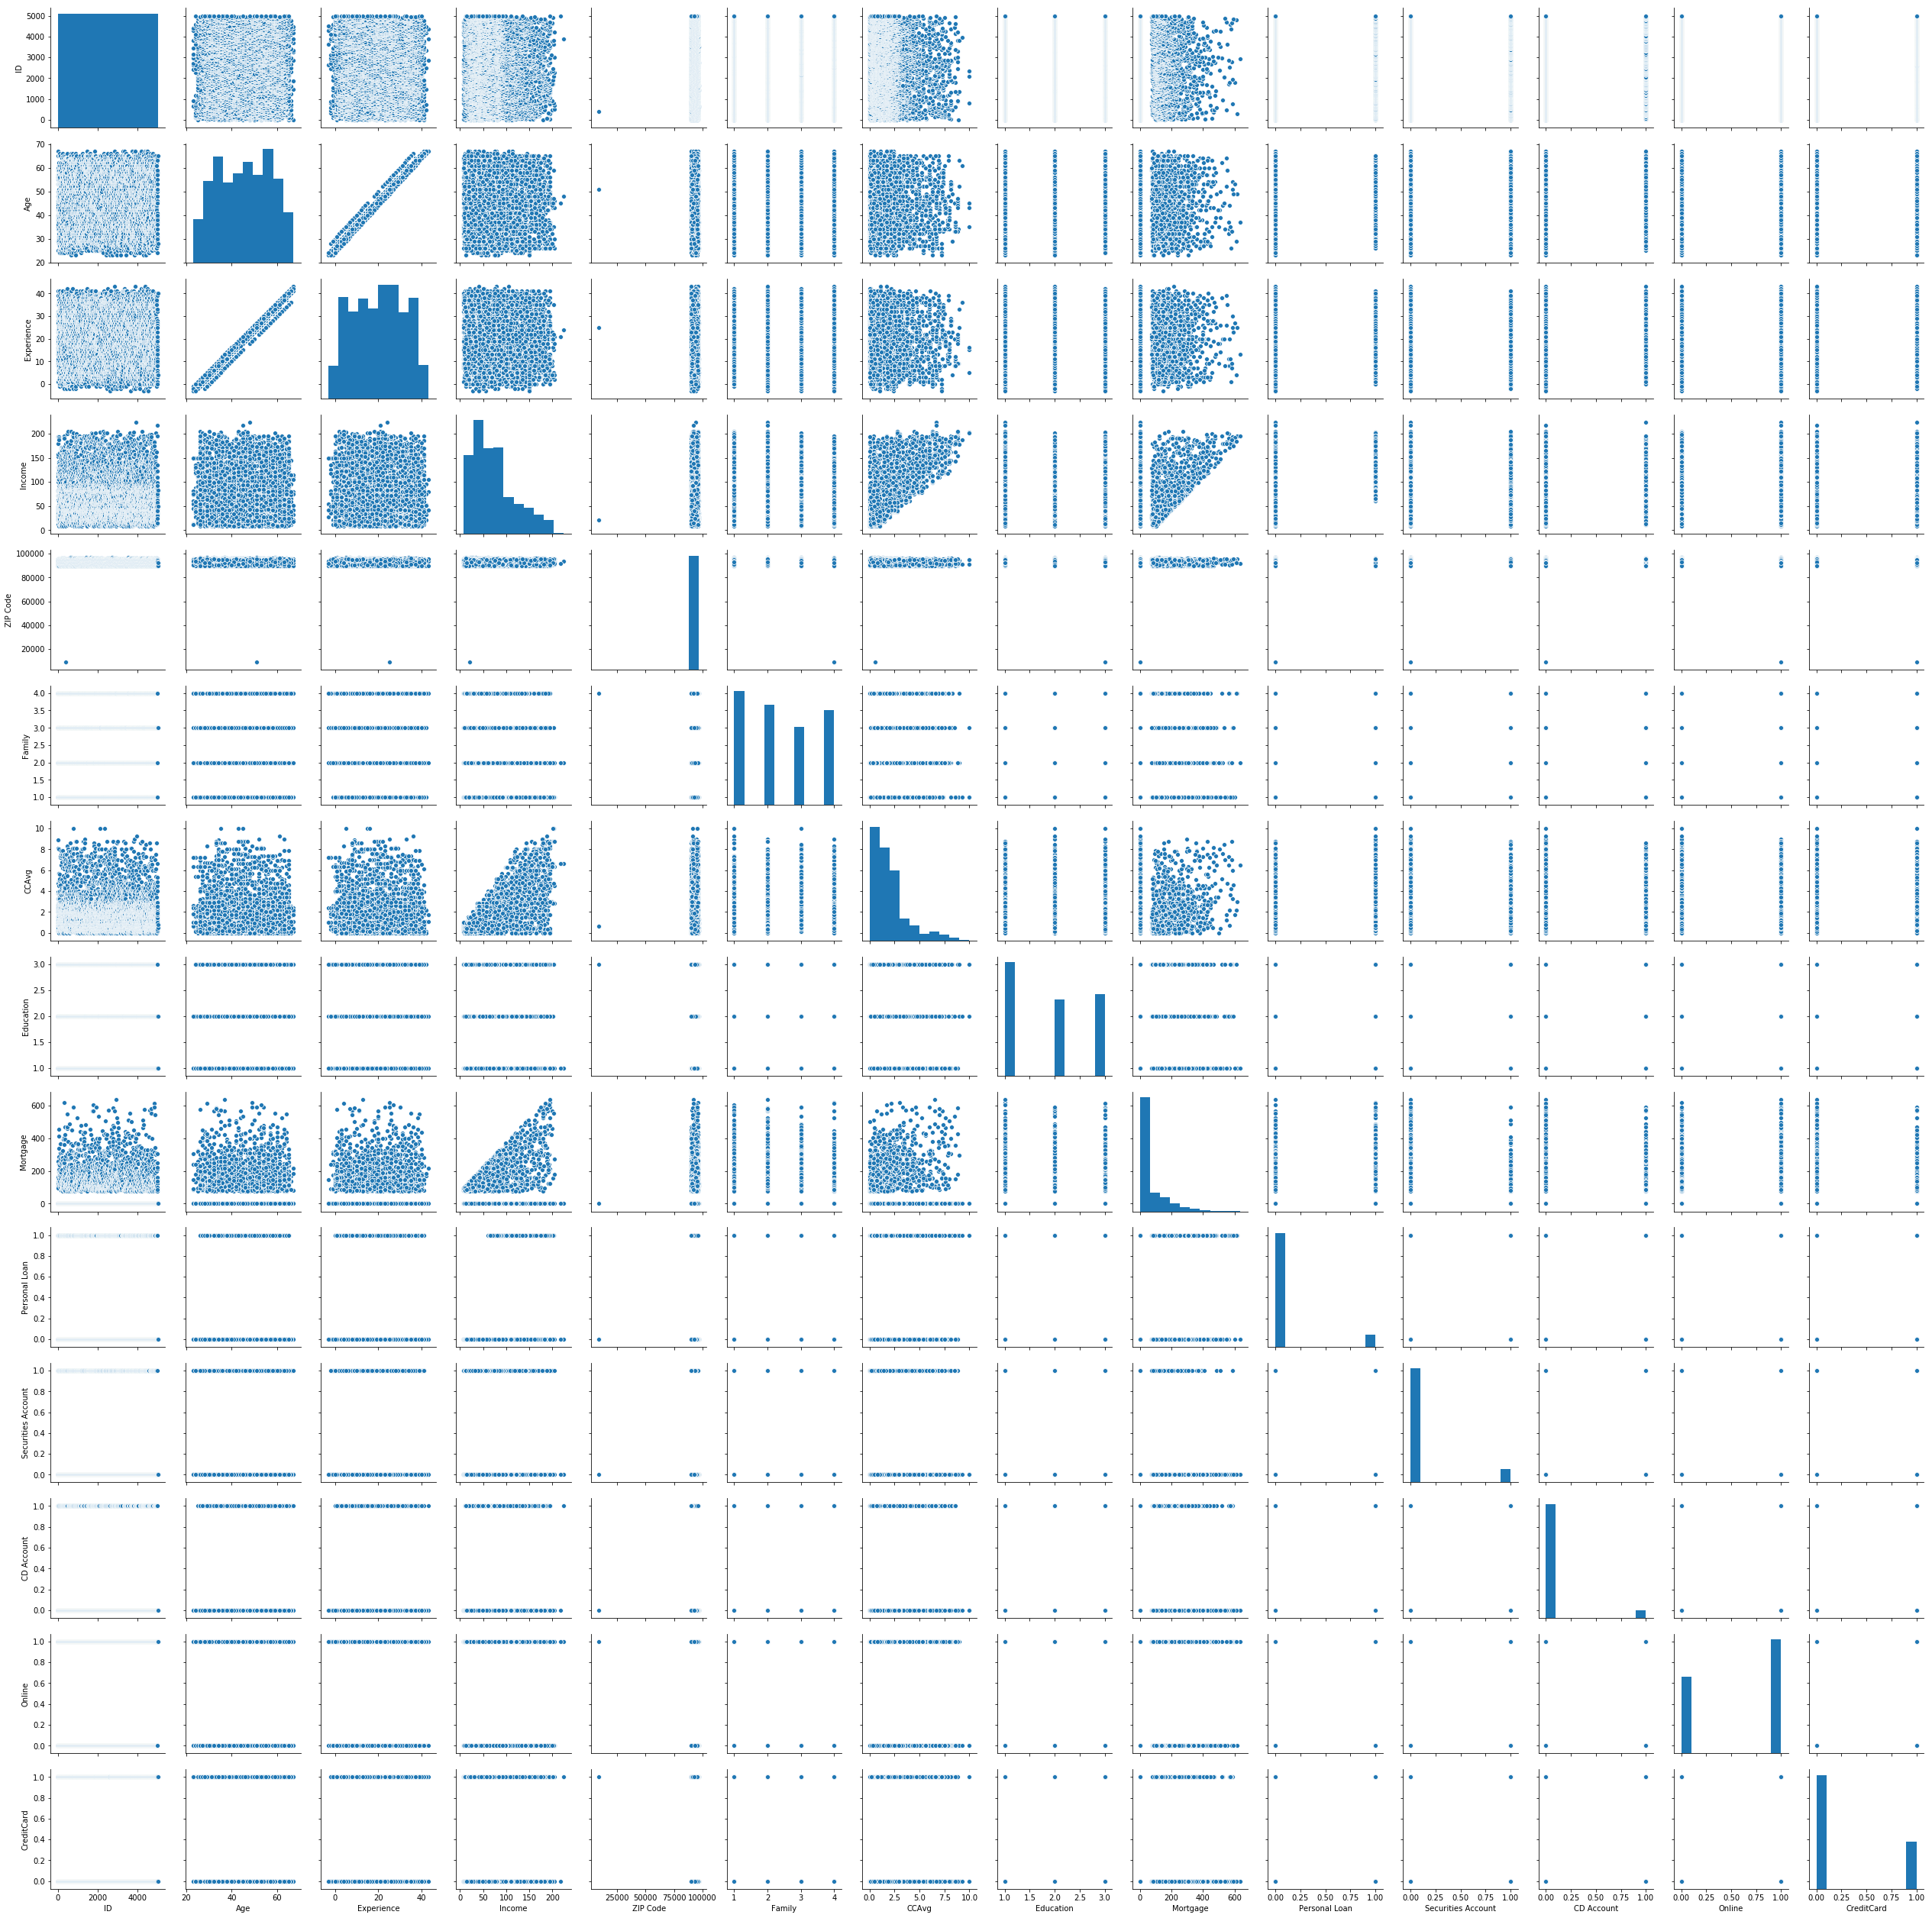

In [509]:
sns.pairplot(df_main)
plt.show()

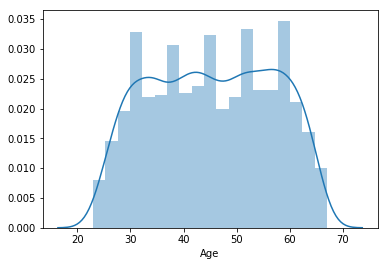

In [510]:
sns.distplot(df_main['Age'])
plt.show()
#Age is a continuous data. Ranges between 20 and 70 and it is not normally distributed.
#People between age 30 to 60 are maximum in number in this dataset 

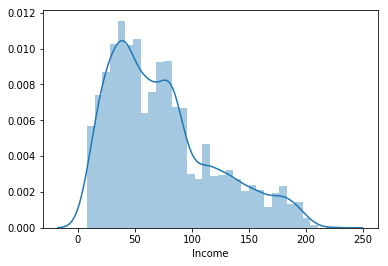

Mean 73.7742
Mode ModeResult(mode=array([44], dtype=int64), count=array([85]))


In [511]:
sns.distplot(df_main['Income'])
plt.show()
#Income is a continuous data. It is not normally distributed. 
print("Mean",np.mean(df_main['Income']))
print("Mode",ss.mode(df_main['Income']))
#Since mean is greater than mode this attribute is right skewed
#Accourding to the data People with Income $44K(approx) are more.

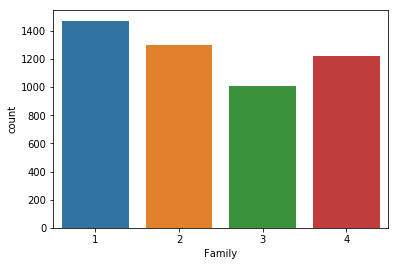

In [512]:
sns.countplot(x = "Family",data = df_main)
plt.show()
#There are four categories in the attribute family. This attribute is a categorical data
#Customers who are single are more in this data set

In [513]:
df_main['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

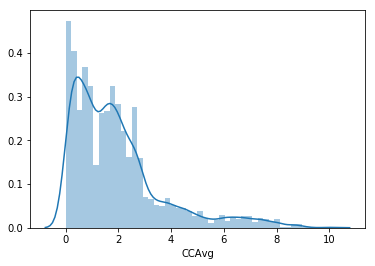

Mean 1.9379380000000053
Mode ModeResult(mode=array([0.3]), count=array([241]))


In [514]:
sns.distplot(df_main['CCAvg'])
plt.show()
#CCAVG is a continuous data. It is not normally distributed. The data is 
print("Mean",np.mean(df_main['CCAvg']))
print("Mode",ss.mode(df_main['CCAvg']))
#Since mean is greater than mode this attribute is right skewed

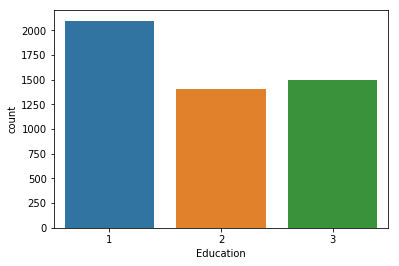

In [515]:
sns.countplot(x = "Education",data = df_main)
plt.show()
#Based on the graph Undergrads are more in this dataset 

In [516]:
df_main['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

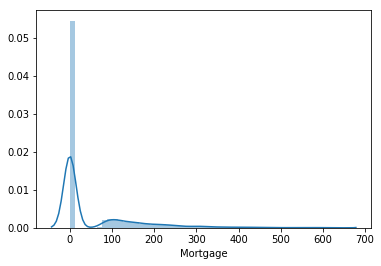

"\nThe distibution of this attribute shows that there are more customers (3462) who haven't \nmortgaged their house or don't own a house.\n"

In [517]:
sns.distplot(df_main['Mortgage'])
plt.show()
'''
The distibution of this attribute shows that there are more customers (3462) who haven't 
mortgaged their house or don't own a house.
'''

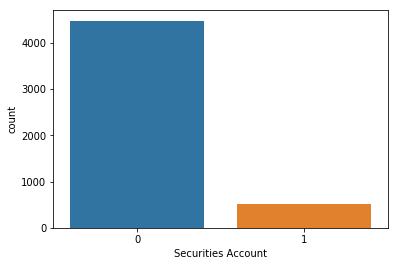

In [518]:
sns.countplot(x = "Securities Account",data = df_main)
plt.show()
#pd.unique(df_main['Securities Account'])

In [519]:
df_main['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

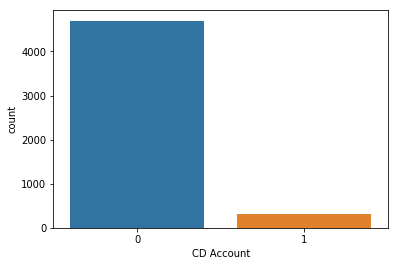

In [520]:
sns.countplot(x='CD Account',data=df_main)
plt.show()

In [521]:
df_main['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

The attributes CD Account and securities account are positively correlated with corrleation of 0.3. 
According to the data available, in both the attributes most of the customers in the data were 
not having securities acc and CD account. 

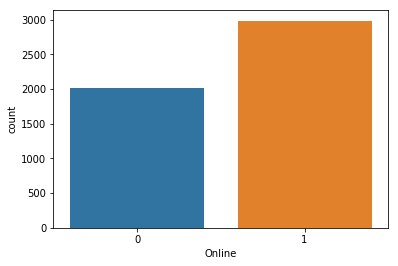

In [522]:
sns.countplot(x='Online',data=df_main)
plt.show()

In [523]:
df_main['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

According to the given data, the customers who use Internet banking facilities are high in the datset.

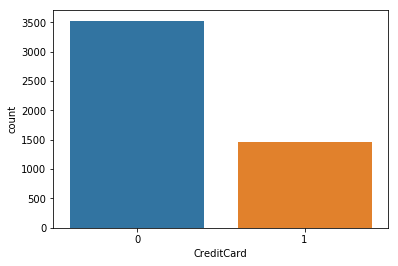

In [524]:
sns.countplot(x='CreditCard',data = df_main)
plt.show()

In [525]:
df_main['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Most of the cutomers present in the dataset do not use Credit Card.

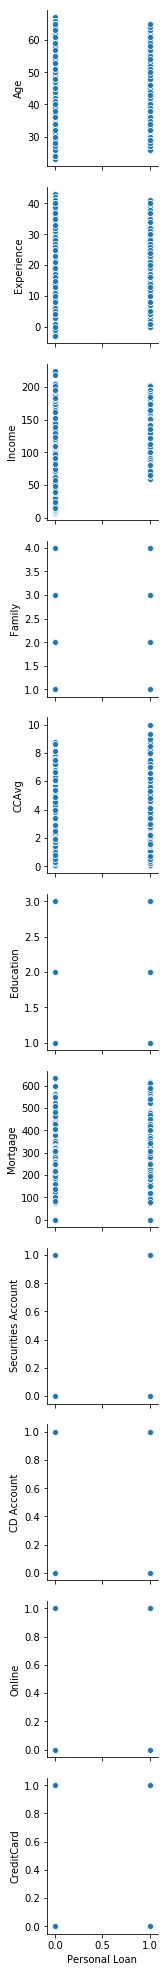

In [526]:
sns.pairplot(data=df_main,x_vars=['Personal Loan'],y_vars=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'])
plt.show()
#Pair plot of all attributes with personal load - Dependent variable

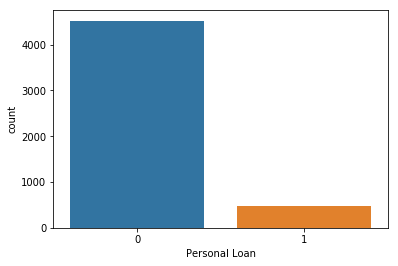

In [527]:
sns.countplot(df_main['Personal Loan'])
plt.show()

In [528]:
(df_main['Personal Loan'] == 1).value_counts()

False    4520
True      480
Name: Personal Loan, dtype: int64


The distribution and the above cell shows that as per the given data, most customers 
did not accept the loan during the previous run


In [529]:
df_zip_code = pd.get_dummies(df_main['ZIP Code'])

In [530]:
df_family = pd.get_dummies(df_main['Family'])

In [531]:
df_education = pd.get_dummies(df_main['Education'])

In [532]:
df_main.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [533]:
df_zip_code.head()

9307   90005  90007  90009  90011  90016  90018  90019  90024  90025  ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   95973  96001  96003  96008  96064  96091  96094  96145  96150  96651  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 467 columns]

In [534]:
df_knn = df_main.drop(columns=['ID','ZIP Code'],axis=1)

In [535]:
df_family.rename(columns={1:'Family1',
                          2:'Family2',
                          3:'Family3',
                          4:'Family4'}, 
                 inplace=True)

In [536]:
df_knn['Family1'] = df_family['Family1']
df_knn['Family2'] = df_family['Family2']
df_knn['Family3'] = df_family['Family3']

In [537]:
#df_knn.head()
#df_knn.drop(columns='Family',inplace=True)
df_knn.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  Family1  Family2  \
0                   1           0       0           0        0        0   
1                   1           0       0           0        0        0   
2                   0           0       0           0        1        0   
3                   0           0       0           0        1        0   
4                   0           0       0           1        0        0   

   Family3  
0        0  
1        1  
2        0  
3        0  
4        0

In [538]:
#df_education.head()
df_education.rename(columns={1:'Edu1',
                          2:'Edu2',
                          3:'Edu3'}, 
                 inplace=True)

In [539]:
df_knn['Edu1'] = df_education['Edu1']
df_knn['Edu2'] = df_education['Edu2']
df_knn['Edu3'] = df_education['Edu3']

In [540]:
df_knn.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  Family1  Family2  \
0                   1           0       0           0        0        0   
1                   1           0       0           0        0        0   
2                   0           0       0           0        1        0   
3                   0           0       0           0        1        0   
4                   0           0       0           1        0        0   

   Family3  Edu1  Edu2  Edu3  
0        0     1     0     0  
1        1     1     0     0  
2        0     1     0     0  
3        0     0     1     0  
4        0     0     1     0

In [541]:
df_knn.drop(columns=['Family','Education'],inplace = True)

In [542]:
median_replace = int(df_knn['Experience'].median())
mean_replace = int(df_knn['Experience'].mean())
replace = []
for i in df_knn['Experience']:
    if i < 0:
        replace.append(mean_replace)
    else:
        replace.append(i)
df_knn['Experience'] = replace

In [543]:
df_knn['Personal Loan'] = df_knn['Personal Loan'].astype('category')
df_knn['Securities Account'] = df_knn['Securities Account'].astype('category')
df_knn['CD Account'] = df_knn['CD Account'].astype('category')
df_knn['Online'] = df_knn['Online'].astype('category')
df_knn['CreditCard'] = df_knn['CreditCard'].astype('category')
df_knn['Family1'] = df_knn['Family1'].astype('category')
df_knn['Family2'] = df_knn['Family2'].astype('category')
df_knn['Family3'] = df_knn['Family3'].astype('category')
df_knn['Edu1'] = df_knn['Edu1'].astype('category')
df_knn['Edu2'] = df_knn['Edu2'].astype('category')
df_knn['Edu3'] = df_knn['Edu3'].astype('category')

In [544]:
df_continuous = df_knn[['Age','Experience','Income','CCAvg','Mortgage']]

In [545]:
df_continuous.describe()

Age   Experience       Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     45.338400    20.327600    73.774200     1.937938    56.498800
std      11.463166    11.253035    46.033729     1.747659   101.713802
min      23.000000     0.000000     8.000000     0.000000     0.000000
25%      35.000000    11.000000    39.000000     0.700000     0.000000
50%      45.000000    20.000000    64.000000     1.500000     0.000000
75%      55.000000    30.000000    98.000000     2.500000   101.000000
max      67.000000    43.000000   224.000000    10.000000   635.000000

In [546]:
df_continuous = df_continuous.apply(zscore)

In [547]:
df_knn[['Age','Experience','Income','CCAvg','Mortgage']] = df_continuous

In [548]:
df_knn.head()

Age  Experience    Income     CCAvg  Mortgage Personal Loan  \
0 -1.774417   -1.717717 -0.538229 -0.193385 -0.555524             0   
1 -0.029524   -0.117989 -0.864109 -0.250611 -0.555524             0   
2 -0.552992   -0.473484 -1.363793 -0.536736 -0.555524             0   
3 -0.901970   -1.006727  0.569765  0.436091 -0.555524             0   
4 -0.901970   -1.095601 -0.625130 -0.536736 -0.555524             0   

  Securities Account CD Account Online CreditCard Family1 Family2 Family3  \
0                  1          0      0          0       0       0       0   
1                  1          0      0          0       0       0       1   
2                  0          0      0          0       1       0       0   
3                  0          0      0          0       1       0       0   
4                  0          0      0          1       0       0       0   

  Edu1 Edu2 Edu3  
0    1    0    0  
1    1    0    0  
2    1    0    0  
3    0    1    0  
4    0    1    0

In [549]:
from sklearn.model_selection import train_test_split

In [550]:
print("Total length of train data",len(df_knn))
print("Percentage of people who did not accept the loan in the DS: ",(len(df_knn[df_knn['Personal Loan'] == 0])/len(df_knn))*100)
print("Percentage of people who accepted the loan in the DS: ",(len(df_knn[df_knn['Personal Loan'] == 1])/len(df_knn))*100)

Total length of train data 5000
Percentage of people who did not accept the loan in the DS:  90.4
Percentage of people who accepted the loan in the DS:  9.6


In [551]:
x = df_knn.drop(columns='Personal Loan',axis=1)
y = df_knn['Personal Loan']

In [552]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=1)

In [553]:
print("Total length of train data",len(y_train))
print("Percentage of people who did not accept the loan in the train data: ",(len(y_train[y_train[:] == 0])/len(y_train))*100)
print("Percentage of people who accepted the loan in the train data: ",(len(y_train[y_train[:] == 1])/len(y_train))*100)

Total length of train data 3500
Percentage of people who did not accept the loan in the train data:  90.54285714285714
Percentage of people who accepted the loan in the train data:  9.457142857142857


In [554]:
print("Total length of train data",len(y_test))
print("Percentage of people who did not accept the loan in the train data: ",(len(y_test[y_test[:] == 0])/len(y_test))*100)
print("Percentage of people who accepted the loan in the train data: ",(len(y_test[y_test[:] == 1])/len(y_test))*100)

Total length of train data 1500
Percentage of people who did not accept the loan in the train data:  90.06666666666666
Percentage of people who accepted the loan in the train data:  9.933333333333334


In [555]:
from sklearn.neighbors import KNeighborsClassifier

In [556]:
Knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
Knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [557]:
predicted_y = Knn.predict(x_test)

In [558]:
Knn.score(x_test,y_test)

0.9533333333333334

In [559]:
from sklearn.linear_model import LogisticRegression

In [560]:
logistic = LogisticRegression(solver="liblinear")


In [561]:
logistic.fit(x_train,y_train)
pred_y_lr = logistic.predict(x_test)

In [562]:
logistic.score(x_test,y_test)

0.9553333333333334

In [563]:
from sklearn.naive_bayes import GaussianNB

In [564]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

In [565]:
pred_gaussian = gaussian.predict(x_test)

In [566]:
gaussian.score(x_test,y_test)

0.89

In [567]:
from sklearn.metrics import confusion_matrix

In [568]:
cm_knn = confusion_matrix(y_test,predicted_y)
cm_logit = confusion_matrix(y_test,pred_y_lr)
cm_naive = confusion_matrix(y_test,pred_gaussian)

In [569]:
cm_knn

array([[1348,    3],
       [  67,   82]], dtype=int64)

In [570]:
cm_logit

array([[1342,    9],
       [  58,   91]], dtype=int64)

In [571]:
cm_naive

array([[1249,  102],
       [  63,   86]], dtype=int64)

The Confusion matrix in form of heatmap for KNN: 


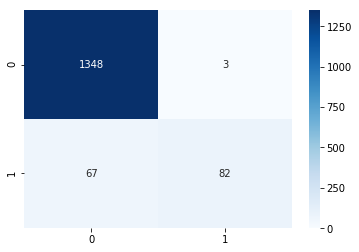

In [572]:
print("The Confusion matrix in form of heatmap for KNN: ")
sns.heatmap(cm_knn,annot=True,fmt='g',cmap='Blues')
plt.show()

The Confusion matrix in form of heatmap for Logistic Regression: 


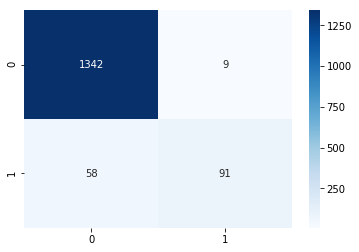

In [573]:
print("The Confusion matrix in form of heatmap for Logistic Regression: ")
sns.heatmap(cm_logit,annot=True,fmt='g',cmap='Blues')
plt.show()

The Confusion matrix in form of heatmap for Naive Bayes: 


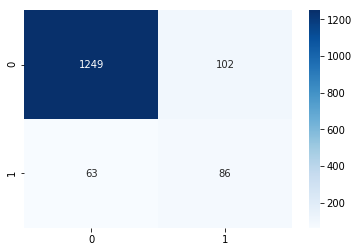

In [574]:
print("The Confusion matrix in form of heatmap for Naive Bayes: ")
sns.heatmap(cm_naive,annot=True,fmt='g',cmap='Blues')
plt.show()

In [577]:
print("The accuracy percentage of KNN model is: ",Knn.score(x_test,y_test)*100)
print("The accuracy percentage of Logistic Regression model is: ",logistic.score(x_test,y_test)*100)
print("The accuracy percentage of Naive Bayes model is: ",gaussian.score(x_test,y_test)*100)

The accuracy percentage of KNN model is:  95.33333333333334
The accuracy percentage of Logistic Regression model is:  95.53333333333333
The accuracy percentage of Naive Bayes model is:  89.0


From the above results it is evident that KNN and Logistic regression can be opted for this classification problem. The reason why Naive Bayes can't be used for this classification model is, Naive Bayes treats each independent variable as independent of each other. In other words, it doesn't take correlation into consideration. Moreover, if categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction.

In our case correlation is an important factor. Both KNN and Logistic regression takes correlation into consideration. Hence for this model we should opt eihter KNN or Logistic Regression. If perfomance is taken into consideration then we should go with Logistic Regression since KNN is a lazy learner. 